In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [ ]:
data_dir_train = "/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_test = "/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

In [ ]:
import pathlib
import tensorflow as tf
# ... other imports ...

data_dir_train = pathlib.Path("/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2250
118


In [ ]:
import pathlib
import tensorflow as tf
# ... other imports ...
import random

data_dir_train = pathlib.Path("/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

2250
118


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 9 classes.
Using 450 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


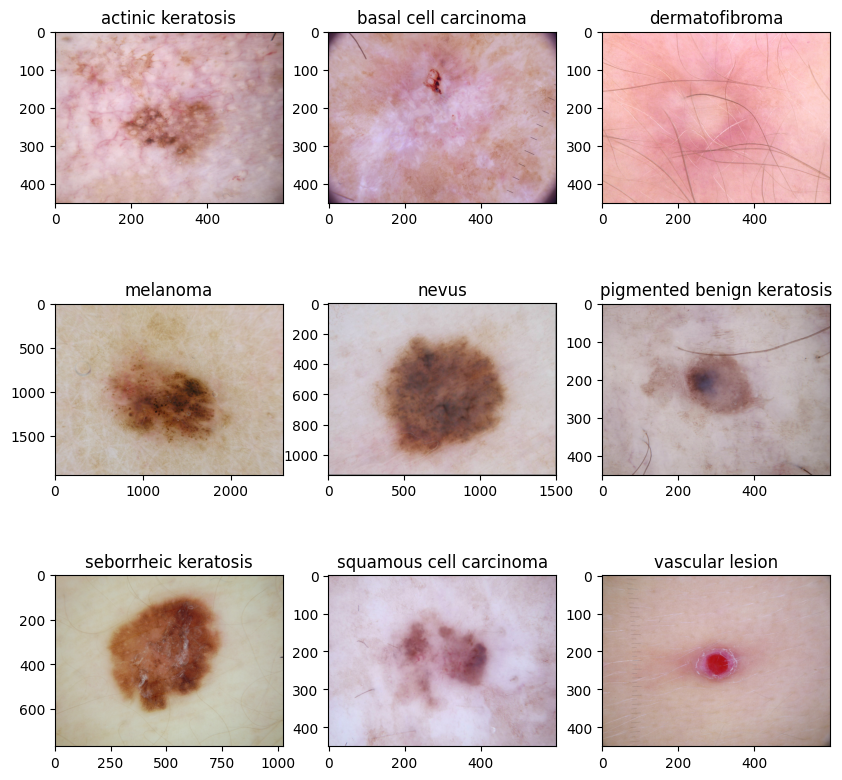

In [ ]:
import pathlib
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as img



num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# Import Rescaling from tensorflow.keras.layers
from tensorflow.keras.layers import Rescaling

num_classes = 9
model = Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3))])


model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.optimizers import Adam # Import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy # Import SparseCategoricalCrossentropy here

# Use learning_rate instead of lr
opt = Adam(learning_rate=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,686,025 (56.02 MB)

 Trainable params: 14,686,025 (56.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
model.save('/content/drive/MyDrive/model/model.h5')

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.7826 - loss: 0.6354 - val_accuracy: 0.5489 - val_loss: 1.9771
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.8241 - loss: 0.4456 - val_accuracy: 0.5867 - val_loss: 1.8838
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.8852 - loss: 0.3100 - val_accuracy: 0.5378 - val_loss: 2.3470
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.8895 - loss: 0.3206 - val_accuracy: 0.5311 - val_loss: 2.0807
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 233s 4s/step - accuracy: 0.8829 - loss: 0.3146 - val_accuracy: 0.5578 - val_loss: 2.5108
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.8949 - loss: 0.2499 - val_accuracy: 0.5333 - val_loss: 2.5989
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.9129 - loss: 0.1884 - val_accuracy: 0.5133 - val_loss: 2.5791
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.8685 - loss: 0.3108 - val_accuracy: 0.4756 - v

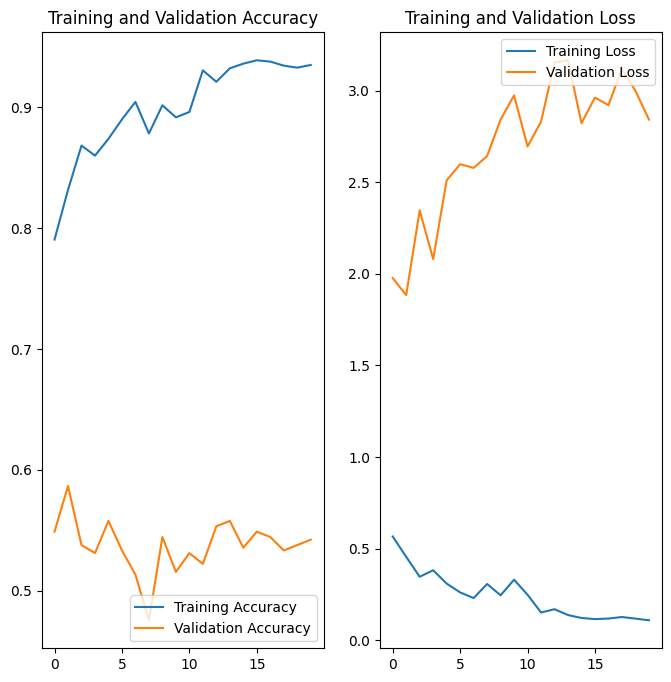

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

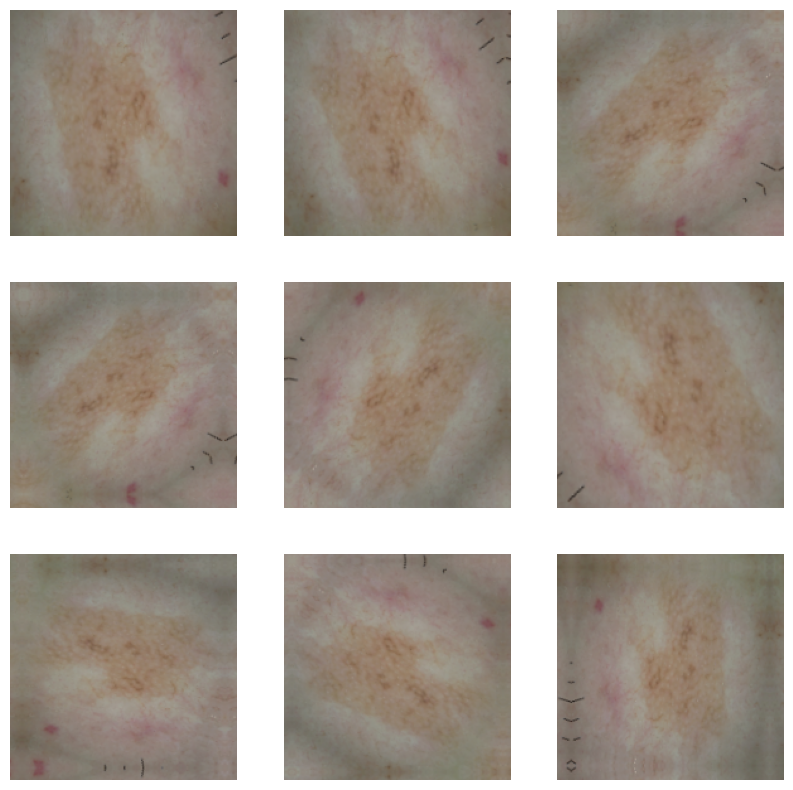

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
num_classes = 9

model = Sequential()
for layer in data_augmentation.layers:
    model.add(layer)

from tensorflow.keras.layers import Rescaling
# Use the imported Rescaling class
model.add(Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [ ]:
opt = Adam(learning_rate=0.001) # Replace 'lr' with 'learning_rate'
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
model.save('/content/drive/MyDrive/model/model.h5')

Epoch 1/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.1902 - loss: 2.0257 - val_accuracy: 0.2667 - val_loss: 1.9263
Epoch 2/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.2838 - loss: 1.8987 - val_accuracy: 0.3156 - val_loss: 1.8056
Epoch 3/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.3597 - loss: 1.7310 - val_accuracy: 0.2956 - val_loss: 1.8337
Epoch 4/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.3334 - loss: 1.7371 - val_accuracy: 0.4444 - val_loss: 1.6071
Epoch 5/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.4282 - loss: 1.5837 - val_accuracy: 0.4311 - val_loss: 1.6015
Epoch 6/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.4123 - loss: 1.6321 - val_accuracy: 0.4733 - val_loss: 1.5330
Epoch 7/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.4410 - loss: 1.5587 - val_accuracy: 0.4778 - val_loss: 1.5452
Epoch 8/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.4812 - loss: 1.4611 - val_accuracy: 0.4711 - v

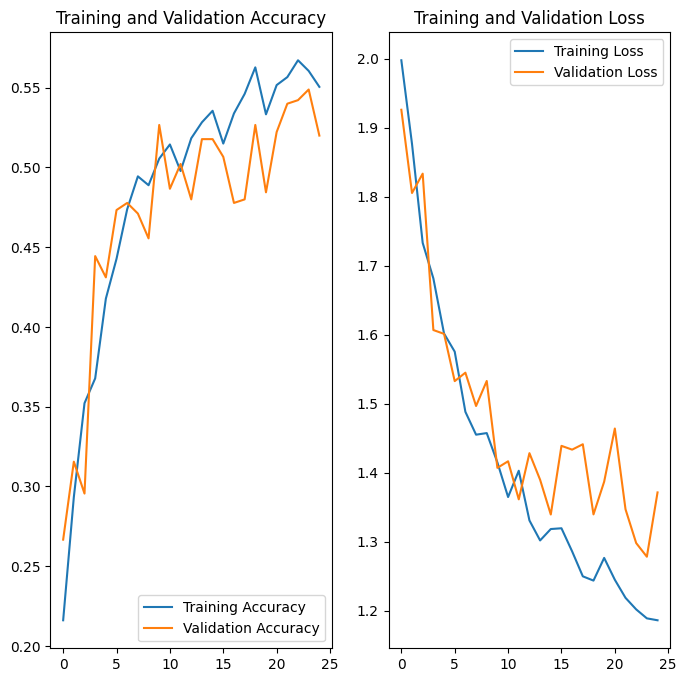

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ... (rest of the plotting code)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# ... other imports ...
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# %%
data_dir_train = pathlib.Path("/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

# %%
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed) # Now 'random' is recognized

# Assuming train_ds was defined in an earlier cell
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width), # Added closing parenthesis
                                        # and img_width
                                            )

Found 2250 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:
!pip install Augmentor

In [ ]:
!pip install Augmentor # Install the Augmentor library if not already installed
import Augmentor
import os
import tensorflow as tf
import pathlib # Import pathlib here

# Corrected path to your training dataset in Google Colab
path_to_training_dataset = "/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# Create the output directory if it doesn't exist
output_dir = "//content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument"
os.makedirs(output_dir, exist_ok=True)


data_dir_train = pathlib.Path(path_to_training_dataset)
class_names = [item.name for item in data_dir_train.iterdir() if item.is_dir()]

for i in class_names:
    # Construct the correct path to the class directory
    class_dir = os.path.join(path_to_training_dataset, i)

    # Construct the output directory for this class
    output_class_dir = os.path.join(output_dir, i, "output")
    os.makedirs(output_class_dir, exist_ok=True)  # Create output directory for the class

    # Create the Augmentor Pipeline
    p = Augmentor.Pipeline(class_dir, output_directory=output_class_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 139 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE99A0A9CD0>: 100%|██████████| 1000/1000 [00:30<00:00, 32.48 Samples/s]


Initialised with 114 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE99AC628D0>: 100%|██████████| 1000/1000 [00:32<00:00, 31.10 Samples/s]


Initialised with 357 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7CE9949468D0>: 100%|██████████| 1000/1000 [01:46<00:00,  9.38 Samples/s]


Initialised with 377 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE9A42D0550>: 100%|██████████| 1000/1000 [00:28<00:00, 35.48 Samples/s]


Initialised with 448 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CE9A5CEA590>: 100%|██████████| 1000/1000 [02:01<00:00,  8.22 Samples/s]


Initialised with 95 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE9988F7D10>: 100%|██████████| 1000/1000 [00:28<00:00, 35.64 Samples/s]


Initialised with 181 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE9988DB710>: 100%|██████████| 1000/1000 [00:35<00:00, 28.31 Samples/s]


Initialised with 462 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CE99A3CB5D0>: 100%|██████████| 1000/1000 [00:33<00:00, 30.25 Samples/s]


Initialised with 77 image(s) found.
Output directory set to //content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7CE9949DED10>: 100%|██████████| 1000/1000 [00:53<00:00, 18.58 Samples/s]


In [ ]:
output_dir = pathlib.Path('/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

45000


total training image count = 45000 

-------------------------------------
Class name =  vascular lesion
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  actinic keratosis
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  5000
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  5000
proportion =  0.111111111111

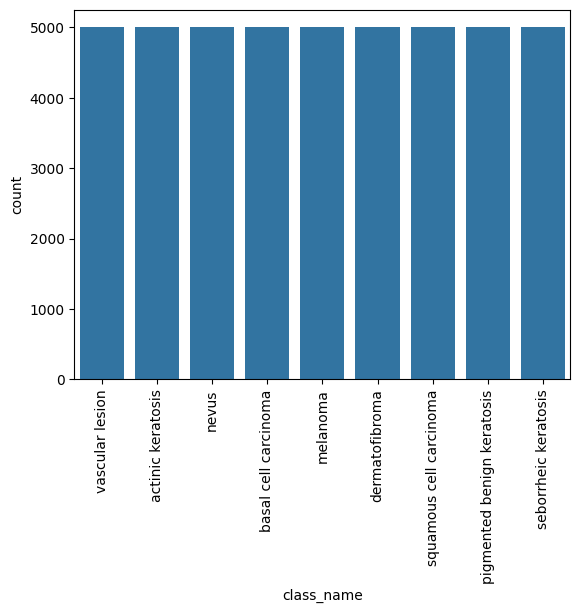

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ... (Rest of the code)
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

# First loop to calculate total
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count

print("total training image count = {} \n".format(total))
print("-------------------------------------")

# Second loop to print class details and proportions
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg'))) # Recalculate count for each class
  print("Class name = ",class_names[i])
  print("count      = ",count)
  # Check if total is not zero before dividing
  if total > 0:
      print("proportion = ",count/total)
  else:
      print("proportion = 0 (Total image count is zero)")
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])


temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Define these variables before calling image_dataset_from_directory
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123 # Although rnd_seed is not directly used in this specific call, it's good practice to keep related variables together

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45000 files belonging to 9 classes.
Using 36000 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45000 files belonging to 9 classes.
Using 9000 files for validation.


In [ ]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Rescaling

from tensorflow.keras.layers import Conv2D, MaxPool2D

num_classes = 9

model = Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3))])


model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())


In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Rescaling, Flatten

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense

num_classes = 9

model = Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3))])


model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import pathlib
output_dir = pathlib.Path('/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/augument')


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45000 files belonging to 9 classes.
Using 9000 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Rescaling

num_classes = 9

model = Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3))])


model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

# Add the Flatten layer here
model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [ ]:
import os
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_skin_cancer(image_path, model, class_names):
    processed_img = preprocess_image(image_path)
    predictions = model.predict(processed_img)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}")
    plt.show()



num_classes = 9

model = Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())


model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax')) # This layer should output probabilities for each class


model_path = '/content/drive/MyDrive/model/model.h5'
model.load_weights(model_path)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


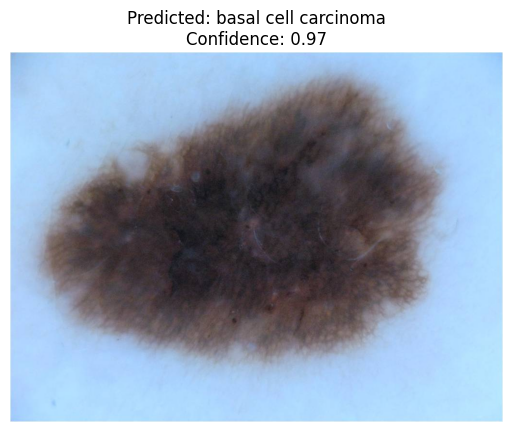

Predicted: basal cell carcinoma with confidence 0.97


In [ ]:
def predict_skin_cancer(image_path, model, class_names):
    import numpy as np
    processed_img = preprocess_image(image_path)
    predictions = model.predict(processed_img)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}")
    plt.show()

    return class_names[predicted_class], confidence


image_path = '/content/drive/MyDrive/archive (1)/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/ISIC_0000000.jpg'
predicted_class, confidence = predict_skin_cancer(image_path, model, class_names)
print(f"Predicted: {predicted_class} with confidence {confidence:.2f}")
